## __What is skewness?__

- Skewness is a measure of the asymmetry of a probability distribution.
- It is a measure of how "lopsided" the distribution is, or how much it deviates from a symmetrical, bell-shaped curve.
- A perfectly symmetrical distribution has a skewness of 0.
- Positive skewness means that the distribution has a long tail to the right, and negative skewness means that it has a long tail to the left.
- Skewness is important to consider because it can affect statistical measures like the mean and standard deviation.

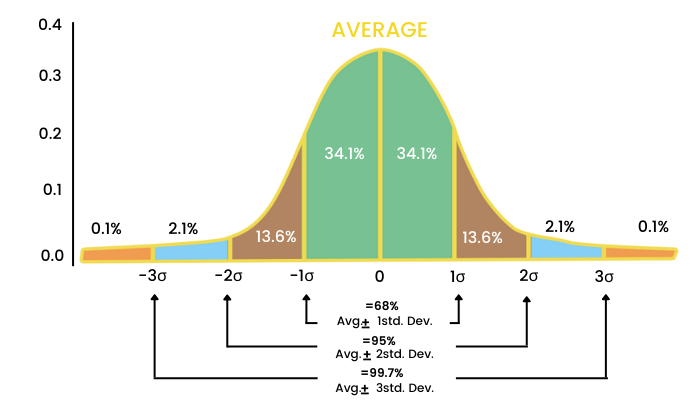

## __Types of Skewness__



__1. Positive Skewness:__ 
- A distribution is positively skewed if it has a long right tail, and the mean is greater than the mode. 
- The majority of the data is concentrated on the left side of the distribution, and there are a few extreme values on the right side.
- Right skewed data will predict better on data points with lower value as compared to those with higher values

__2. Negative Skewness:__
- A distribution is negatively skewed if it has a long left tail, and the mean is less than the mode. 
- The majority of the data is concentrated on the right side of the distribution, and there are a few extreme values on the left side.
- Left skewed data will predict better on data points with Higher value as compared to those with lower values

__3. Zero Skewness:__
- A distribution is symmetrical, or has zero skewness
- If it is perfectly balanced, with equal numbers of data points on either side of the mean. In this case, the mean, median, and mode are all the same.


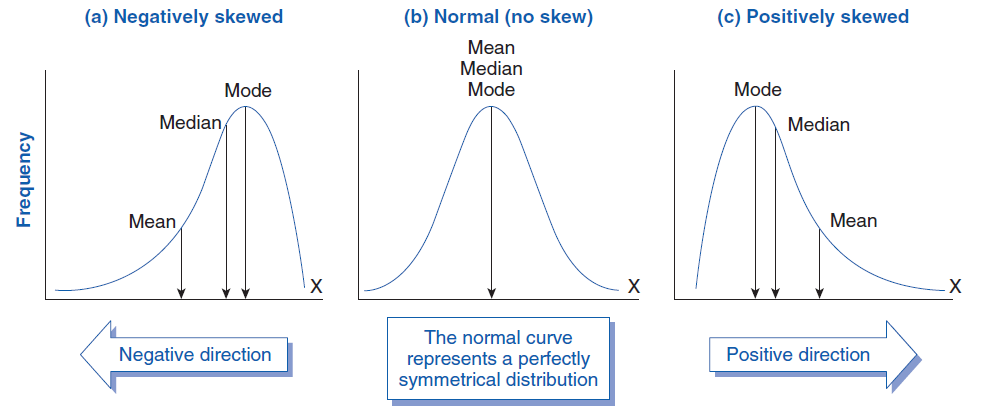

## __Why handling *skewness* is important?__

- Skewed data can affect the accuracy and validity of statistical analyses and machine learning models.
- Skewed data can cause biased results in statistical tests, such as t-tests and ANOVA.
- Handling skewness can help to normalize the data and make it easier to interpret and analyze.
- In some cases, handling skewness may involve removing outliers or transforming the data using mathematical functions.

## __Various Methods for Handling Skewness__

__Datasets__

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

house = pd.read_csv('../data/boston.csv')
loan = pd.read_csv('../data/loan_data.csv')

In [4]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### __How to find skewness__

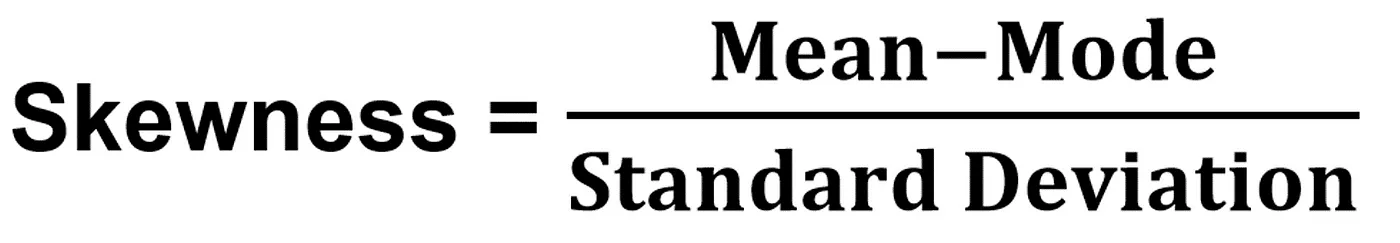

In [10]:
loan.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [32]:
house.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

__Common guidelines for interpreting the degree of skewness in a data distribution:__

- If the skewness is between -0.5 and 0.5, the distribution can be considered approximately symmetric.
- If the skewness is between -1 and -0.5 (negative skewness), or between 0.5 and 1 (positive skewness), the distribution can be considered moderately skewed.
- If the skewness is less than -1 (negative skewness), or greater than 1 (positive skewness), the distribution can be considered highly skewed.
- Skewness values outside of this range may indicate extreme skewness or outliers in the data.


It is important to note that the acceptable range of skewness can vary depending on the specific context and goals of the analysis. In some cases, highly skewed data may be acceptable or even expected, while in other cases, even moderately skewed data may be a cause for concern. Additionally, the type of data and the distribution shape may also affect how skewness is interpreted.

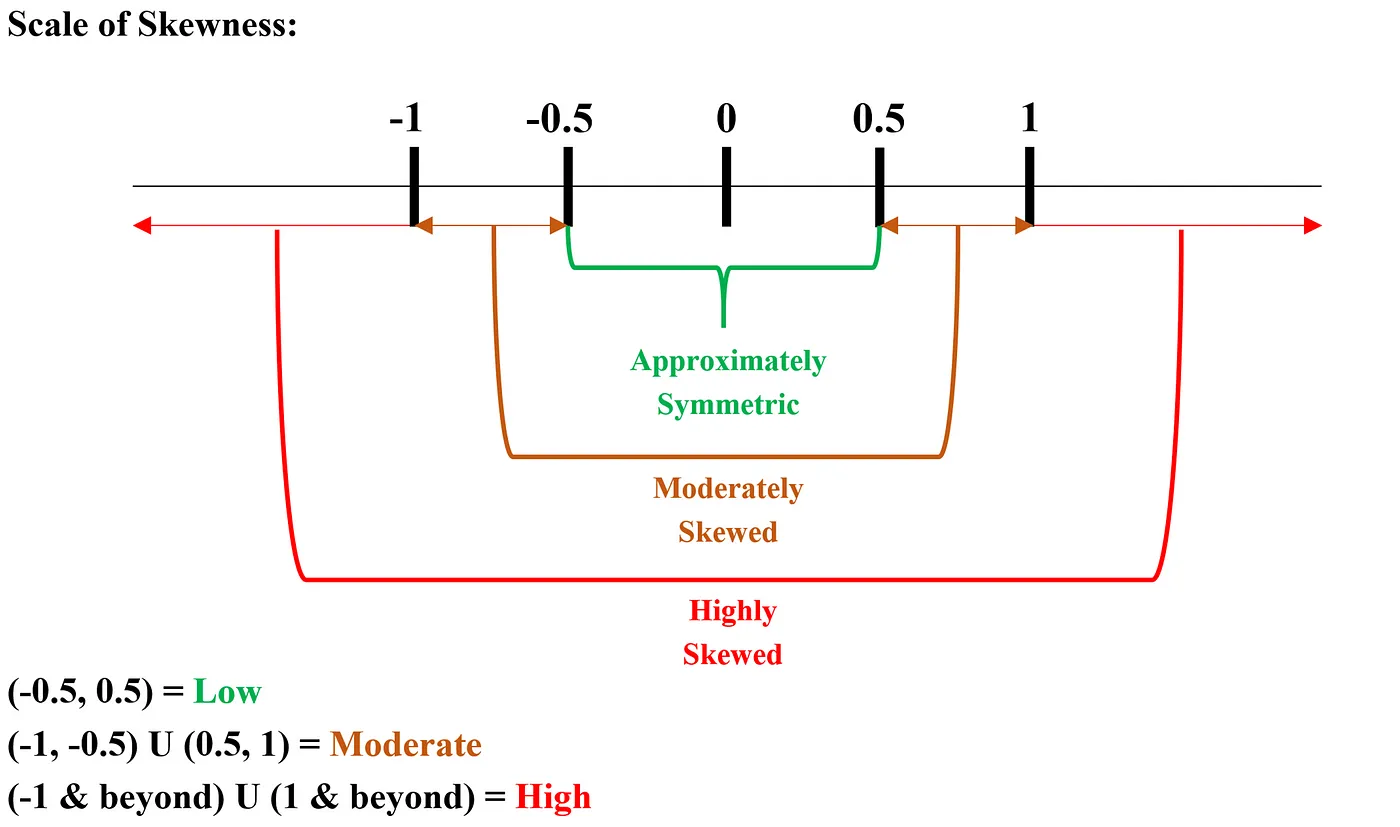

In [56]:
loan['ApplicantIncome'].skew()

6.539513113994625

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

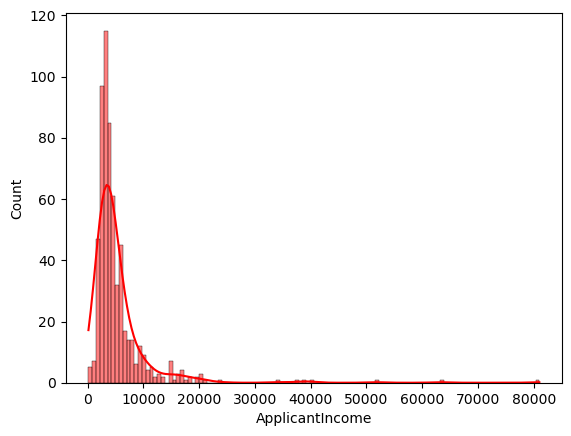

In [62]:
sns.histplot(loan['ApplicantIncome'], kde=True, color='r')

### __Methods for handling the  Right Skewed data__

#### __Log Transformation__

before transformation skew value is : 6.539513113994625
after transformation skew value is : 0.4821279953732817


Text(0.5, 1.0, 'After Transformation')

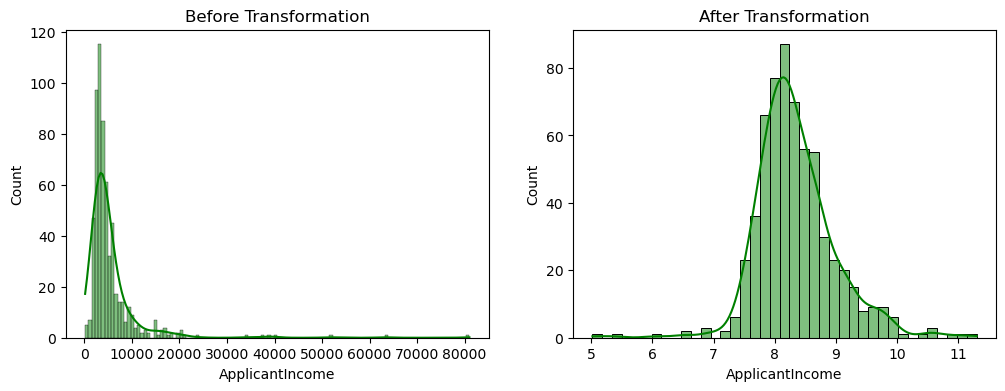

In [132]:
# Creating log function
log_transform = lambda x : np.log1p(x)

# for multiple columns
loan[['ApplicantIncome', 'LoanAmount']].apply(log_transform)

# for single column
loan['ApplicantIncome'].apply(log_transform)

print('before transformation skew value is :', loan['ApplicantIncome'].skew())
print('after transformation skew value is :',np.log1p(loan['ApplicantIncome']).skew())

# plotting the distribution
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((loan['ApplicantIncome']), ax=ax1, color='green', kde=True)
sns.histplot(np.log1p(loan['ApplicantIncome']), ax=ax2, color='green', kde=True)
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

#### __Square Root Transformation__

In [124]:
# Creating sqrt function
sqrt_transform = lambda x : np.sqrt(x)

# for multiple columns
loan[['ApplicantIncome', 'LoanAmount']].apply(sqrt_transform)

# for single column
loan['ApplicantIncome'].apply(sqrt_transform)

print('before transformation skew value is :', loan['ApplicantIncome'].skew())
print('after transformation skew value is :',np.sqrt(loan['ApplicantIncome']).skew())

before transformation skew value is : 6.539513113994625
after transformation skew value is : 2.9672860248621027


Text(0.5, 1.0, 'After Transformation')

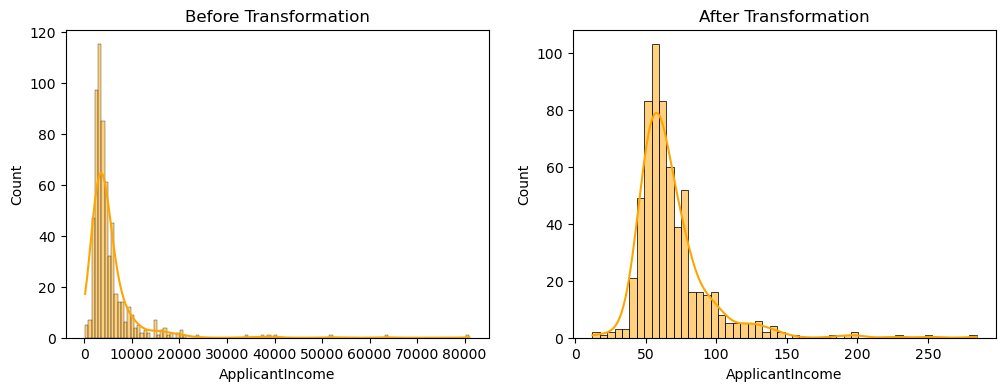

In [134]:
# plotting the distribution
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((loan['ApplicantIncome']), ax=ax1, kde=True, color='orange')
sns.histplot(np.sqrt(loan['ApplicantIncome']), ax=ax2, kde=True, color='orange')
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

### __Power Transformers__

#### __Box-Cox Tranformation__

- Box-Cox requires input data to be strictly positive

In [125]:
from scipy.stats import skew

from sklearn.preprocessing import power_transform

box = power_transform(loan[['ApplicantIncome']], method='box-cox')

print('before transformation skew value is :', loan['ApplicantIncome'].skew())
print('after transformation skew value is :', (skew(box)))

before transformation skew value is : 6.539513113994625
after transformation skew value is : [-0.09228644]


Text(0.5, 1.0, 'After Transformation')

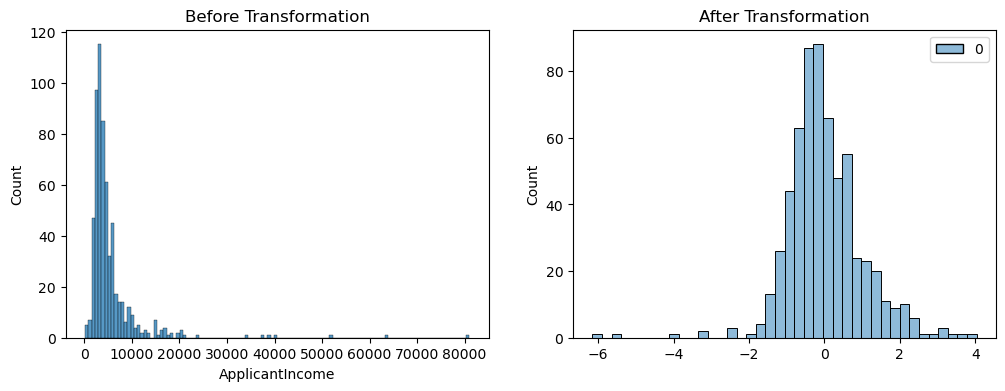

In [136]:
# plotting the distribution
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((loan['ApplicantIncome']), ax=ax1)
sns.histplot(box, ax=ax2)
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

#### __Yeo_Johnson Tranformation__

- Yeo-Johnson supports both positive or negative data

In [128]:
from sklearn.preprocessing import power_transform

yeo = power_transform(loan[['ApplicantIncome']])

print('before transformation skew value is :', loan['ApplicantIncome'].skew())
print('after transformation skew value is :', (skew(yeo)))

before transformation skew value is : 6.539513113994625
after transformation skew value is : [-0.09271846]


Text(0.5, 1.0, 'After Transformation')

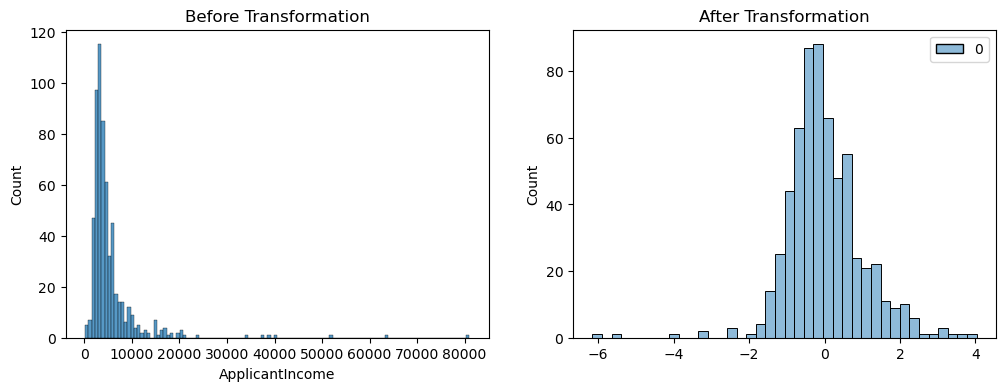

In [129]:
# plotting the distribution
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((loan['ApplicantIncome']), ax=ax1)
sns.histplot(yeo, ax=ax2)
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

#### __Quantile Transformation__

In [112]:
from sklearn.preprocessing import quantile_transform

quant = quantile_transform(loan[['ApplicantIncome']], output_distribution='normal')

print('before transformation skew value is :', loan['ApplicantIncome'].skew())
print('after transformation skew value is :', (skew(quant)))

before transformation skew value is : 6.539513113994625
after transformation skew value is : [-0.00104693]


Text(0.5, 1.0, 'After Transformation')

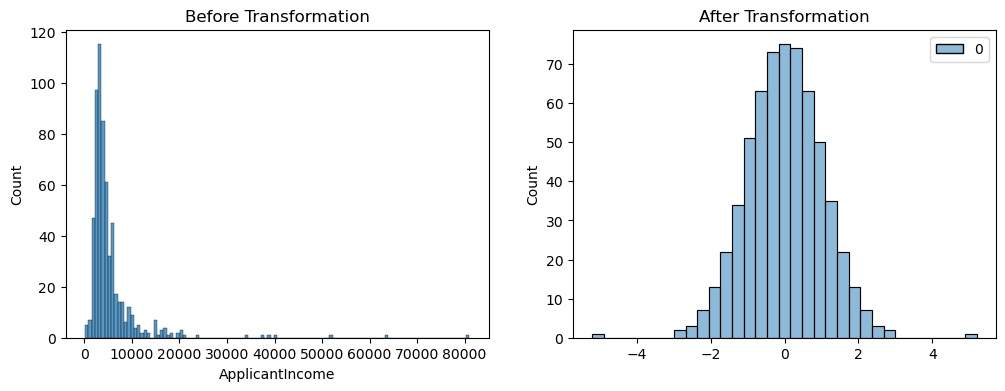

In [130]:
# plotting the distribution
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((loan['ApplicantIncome']), ax=ax1)
sns.histplot(quant, ax=ax2)
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

### __Methods for handling the  Left Skewed data__

In [77]:
# Creating log function
square_transform = lambda x : np.square(x)

# for single column
house['AGE'].apply(square_transform)

print('before transformation skew value is :', house['AGE'].skew())
print('after transformation skew value is :',np.square(house['AGE']).skew())

before transformation skew value is : -0.5989626398812962
after transformation skew value is : -0.18317980506864484


Text(0.5, 1.0, 'After Transformation')

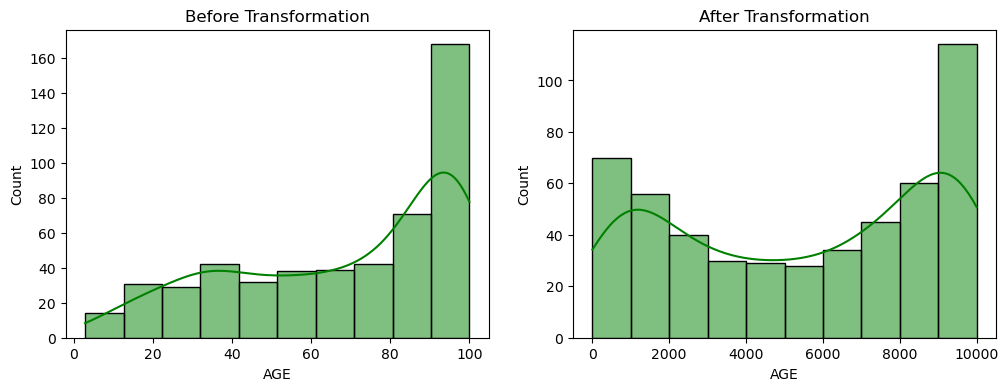

In [139]:
# plotting the distribution
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((house['AGE']), ax=ax1, kde=True, color='green')
sns.histplot(np.square(house['AGE']), ax=ax2, kde=True, color='green')
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

In [146]:
# Creating cuberoot function
cube_transform = lambda x : (x)**3

# for single column
loan['Loan_Amount_Term'].apply(cube_transform)

print('before transformation skew value is :', house['AGE'].skew())
print('after transformation skew value is :',((house['AGE'])**3).skew())

before transformation skew value is : -0.5989626398812962
after transformation skew value is : 0.07091684320803471


Text(0.5, 1.0, 'After Transformation')

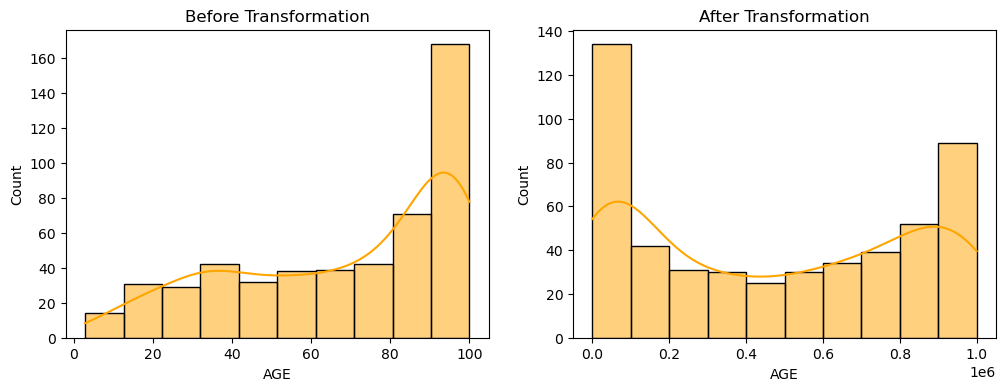

In [147]:
# plotting the distribution
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((house['AGE']), ax=ax1, kde=True, color='orange')
sns.histplot((house['AGE'])**3, ax=ax2, kde=True, color='orange')
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

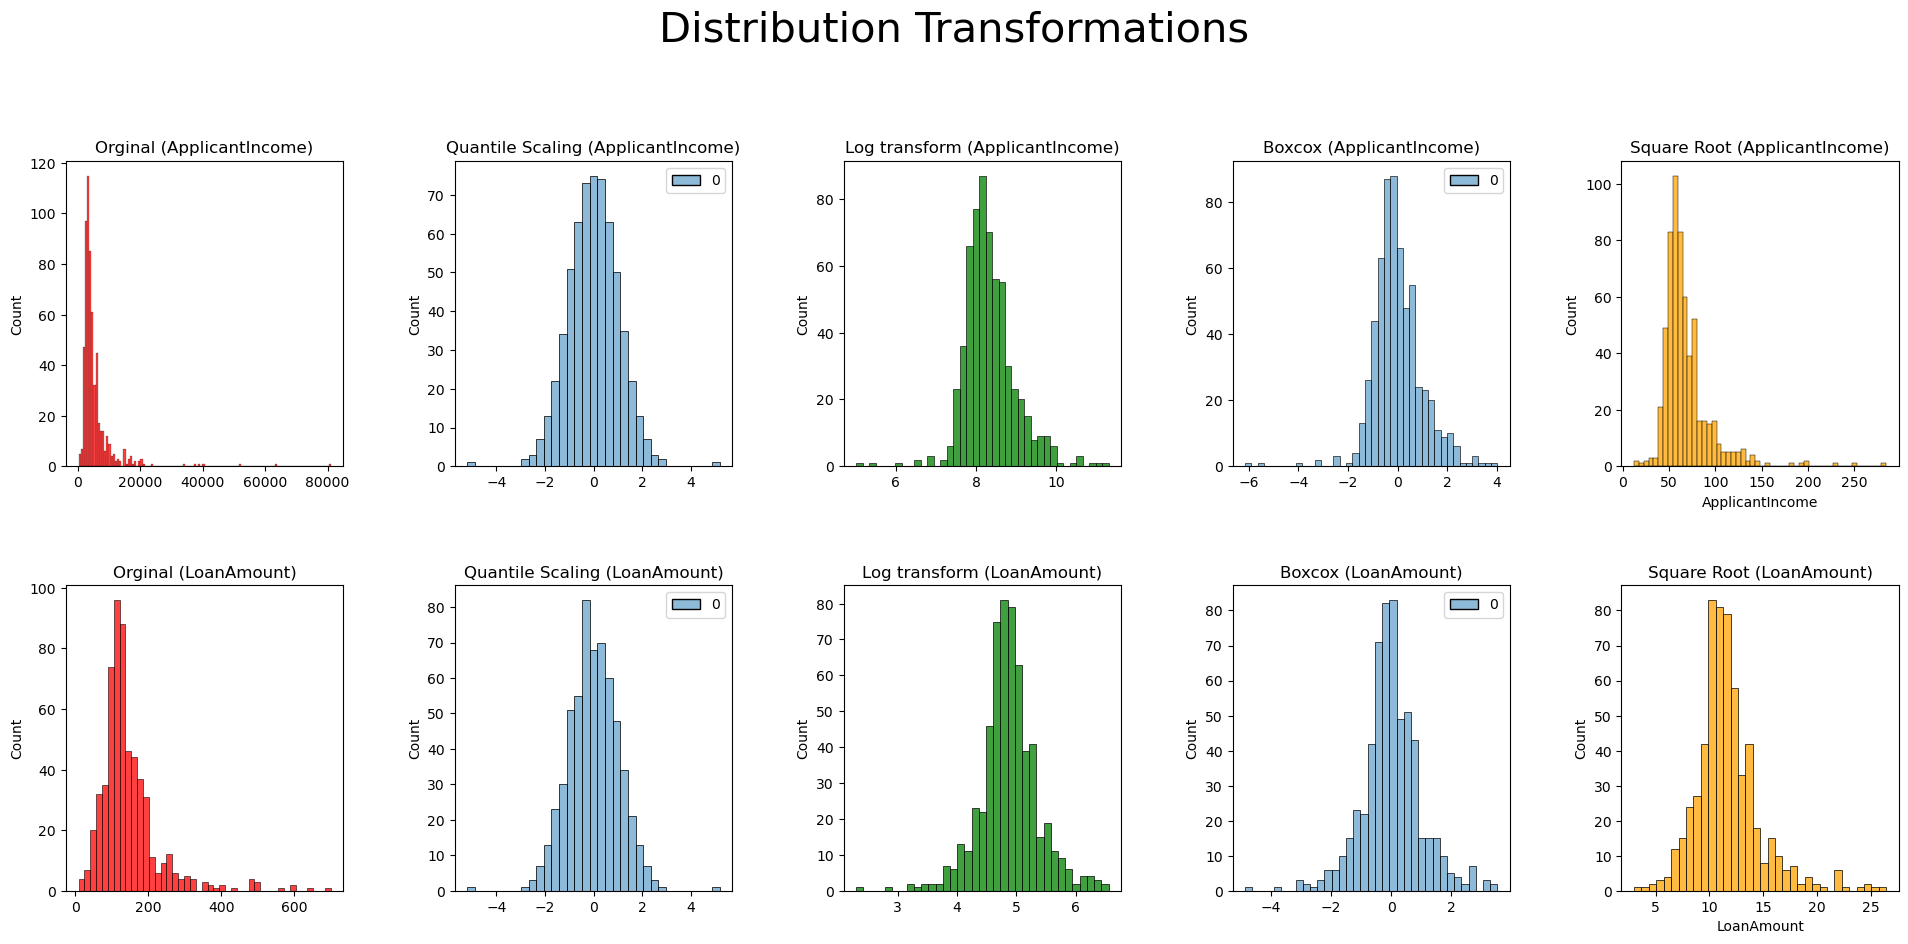

In [155]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

fig,axes = plt.subplots(ncols=5, nrows=2, figsize = (20,10))

non_dist_cols = ['ApplicantIncome', 'LoanAmount']
for index,column in enumerate(non_dist_cols):

    scaler1 = QuantileTransformer(output_distribution="normal")
    quant_df = scaler1.fit_transform(loan[[column]])
    
    scaler2 = PowerTransformer(method='box-cox')
    boxcox_df = scaler2.fit_transform(loan[[column]])

    sns.histplot(x= loan[column], ax=axes[index,0], color ='r')
    sns.histplot(quant_df, ax=axes[index,1], color='blue')
    sns.histplot(np.log1p(loan[column]), ax=axes[index,2], color='green')
    sns.histplot(boxcox_df, ax=axes[index,3])
    sns.histplot(np.sqrt(loan[column]), ax=axes[index,4], color='orange')
    

    axes[index,0].set_title(f"Orginal ({column})")
    axes[index,0].set(xlabel=None)
    axes[index,1].set_title(f"Quantile Scaling ({column})")
    axes[index,2].set_title(f"Log transform ({column})")
    axes[index,2].set(xlabel=None)
    axes[index,3].set_title(f"Boxcox ({column})")
    axes[index,4].set_title(f"Square Root ({column})")

plt.suptitle("Distribution Transformations",fontsize = 30)
plt.tight_layout(pad = 4)
plt.show()

Conclusion:

- Skewness is a concept that comes up frequently in statistics and data analysis, and it refers to the degree to which a data distribution is asymmetrical.
- When a distribution is skewed, it means that the majority of the data is concentrated on one side of the distribution, while the other side has fewer data points and more extreme values.
- Skewness is important to be aware of when analyzing data, because it can affect the results of statistical tests and models that assume a normal distribution.
- In general, if the skewness is between -0.5 and 0.5, the distribution can be considered approximately symmetric, while values outside of this range indicate varying degrees of skewness.
- Left-skewed distributions, where the long tail is on the left, can be addressed with transformations such as logarithmic or square root transformations, while right-skewed distributions can be handled with power transformations or robust statistical methods.
- However, it's important to keep in mind that the appropriate method for handling skewness may depend on the specific context and goals of the analysis, and that there is no one-size-fits-all solution.
- Ultimately, understanding skewness and how to handle it is an important part of any data analysis process, and can help to ensure that the results are accurate and reliable.